# MNIST 숫자 손글씨 분류

## 데이터 준비

### MNIST 숫자 손글씨 Dataset 불러오기

In [2]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__) # 텐서플로우의 버전을 출력

2.4.1


In [3]:
mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행됩니다. 
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))  # x_train 배열의 크기를 출력

60000


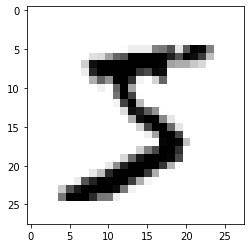

In [4]:
# 불러온 숫자 손글씨 샘플 출력해보기
plt.imshow(x_train[0], cmap=plt.cm.binary)
plt.show()

In [5]:
print(y_train[1])

0


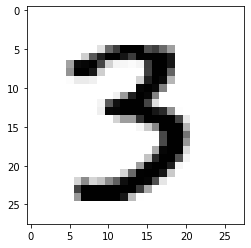

10001 번째 이미지의 숫자는 바로  3 입니다.


In [6]:
# 다른 이미지 출력해보기
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000
plt.imshow(x_train[index], cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ', y_train[index], '입니다.')

### 학습용 데이터와 시험용 데이터

In [ ]:
# (x_train, y_train), (x_test, y_test) = mnist.load_data()

mnist.load( ) 함수를 통해 학습용 데이터 (x_train, y_train)와 시험용 데이터 (x_test, y_test)를 나누어서 받아들이는 것을 볼 수 있는데요.

우리가 만든 숫자 손글씨 분류기는 학습용 데이터 (x_train, y_train)만을 가지고 학습시킵니다. 학습이 끝난 후에는 이 손글씨 분류기가 얼마나 좋은 성능을 보이는지 확인해보고 싶을 텐데요, 이 때 시험용 데이터(x_test,y_test)로 테스트를 할 수 있습니다.

MNIST 데이터셋은 약 500명 사용자가 작성한 숫자 이미지를 가지고 있습니다. 그 중 250여명의 데이터가 학습용 데이터로, 다른 250여명의 데이터가 시험용 데이터로 이용됩니다.

In [8]:
print(x_train.shape) # 28x28 사이즈의 숫자 이미지가 60,000장 이라는 뜻

(60000, 28, 28)


In [9]:
print(x_test.shape) # 28x28 사이즈의 숫자 이미지가 10,000장 이라는 뜻

(10000, 28, 28)


In [11]:
# 숫자 손글씨 이미지의 실제 픽셀 값 확인하기(0~255 사이의 값)
print('최소값:', np.min(x_train), '최대값:', np.max(x_train))

최소값: 0 최대값: 255


인공지능 모델을 훈련시키고 사용할 때, 일반적으로 입력은 0에서 1 사이의 값으로 정규화 시켜주는 것이 좋습니다. MNIST 데이터는 각 픽셀의 값이 0~255 사이 범위에 있으므로 데이터들을 255.0 으로 나누어주면 됩니다.

In [12]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print("최소값: ", np.min(x_train_norm), "최대값: ", np.max(x_train_norm))

최소값:  0.0 최대값:  1.0


## 딥러닝 네트워크 설계하기

In [13]:
# tf.keras의 Sequential API를 이용해 LeNet이라는 딥러닝 네트워크를 설계한 예

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation="relu", input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation="relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

print("Model에 추가된 Layer 개수: ", len(model.layers))

Model에 추가된 Layer 개수:  7


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25632     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                3

In [15]:
print("Before Reshape - x_train_norm shape: {}".format(x_train_norm.shape))
print("Before Reshape - x_test_norm shape: {}".format(x_test_norm.shape))

x_train_reshaped = x_train_norm.reshape( -1, 28, 28, 1)
x_test_reshaped = x_test_norm.reshape( -1, 28, 28, 1)

print("After Reshape - x_train_reshaped shape: {}".format(x_train_reshaped.shape))
print("After Reshape - x_test_reshaped shape: {}".format(x_test_reshaped.shape))

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


In [16]:
model.compile(optimizer="adam",
             loss="sparse_categorical_crossentropy",
             metrics=["accuracy"])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 3ms/step - loss: 0.4569 - accuracy: 0.8589
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0784 - accuracy: 0.9755
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0534 - accuracy: 0.9831
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0415 - accuracy: 0.9866
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0302 - accuracy: 0.9904
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0256 - accuracy: 0.9918
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0209 - accuracy: 0.9935
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0177 - accuracy: 0.9945
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0147 - accuracy: 0.9947
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.012

### 테스트 데이터로 성능 확인하기

In [17]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy : {} ".format(test_accuracy))

313/313 - 2s - loss: 0.0390 - accuracy: 0.9881
test_loss: 0.03899988904595375 
test_accuracy : 0.988099992275238 


### 어떤 데이터를 잘못 추론했을까? 눈으로 확인하기

In [18]:
# model.evaluate() 대신 model.predict() 사용
predicted_result = model.predict(x_test_reshaped)
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

model.predict() 결과 :  [6.3423080e-08 3.1380278e-09 3.0951605e-07 6.3851087e-07 1.3053376e-10
 5.5136090e-10 7.7267497e-14 9.9999869e-01 1.6400998e-08 2.2548093e-07]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


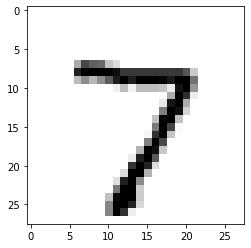

In [19]:
# 이미지로 출력해보기
plt.imshow(x_test[idx], cmap=plt.cm.binary)
plt.show()

그렇다면 model이 추론해 낸 숫자와 실제 라벨의 값이 다른 경우는 어떤 경우인지 직접 확인해 볼 수도 있겠습니다.

예측확률분포: [1.5927106e-05 7.9673707e-02 1.9649146e-05 5.0213561e-13 9.1263860e-01
 2.2871578e-07 7.6428680e-03 2.0151132e-09 4.1727626e-06 4.9034634e-06]
라벨: 1, 예측결과: 4


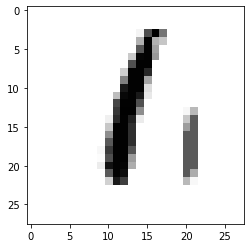

예측확률분포: [1.0481070e-06 1.3739441e-09 2.9965856e-11 8.2554536e-12 7.2473389e-01
 6.5310010e-06 2.7524725e-01 3.3090124e-11 5.6924080e-07 1.0647417e-05]
라벨: 6, 예측결과: 4


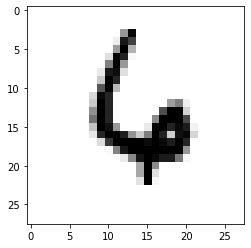

예측확률분포: [9.5398134e-01 4.4071097e-12 2.8389450e-02 1.7422270e-02 5.9686429e-09
 3.7798038e-06 7.7248160e-07 1.1007527e-06 1.4632226e-04 5.5017299e-05]
라벨: 3, 예측결과: 0


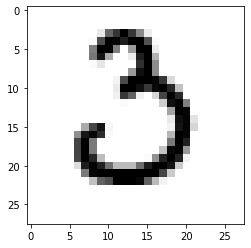

예측확률분포: [6.2391640e-11 9.9933380e-01 3.5840919e-04 2.2949856e-10 3.9160302e-09
 9.6619266e-12 2.1981135e-10 3.0727385e-04 3.8153328e-07 1.2449517e-07]
라벨: 7, 예측결과: 1


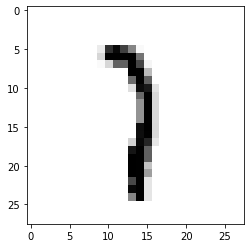

예측확률분포: [4.1917024e-06 8.2098855e-11 3.5607645e-08 1.4129171e-09 9.0271491e-01
 1.6014291e-04 2.8930143e-03 3.6169018e-07 5.7080466e-02 3.7147023e-02]
라벨: 6, 예측결과: 4


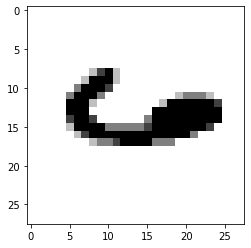

In [52]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels): 
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)
        
samples = random.choices(population = wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 더 좋은 네트워크 만들어 보기

### 하이퍼파라미터 조정

In [53]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1 = 20
n_channel_2 = 40
n_dense=32
n_train_epoch=10

model = keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation = "relu", input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation = "relu"))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation = "relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {} ".format(test_accuracy))

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 20)        200       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 13, 13, 20)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 11, 11, 40)        7240      
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 5, 5, 40)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1000)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 32)                32032     
_________________________________________________________________
dense_13 (Dense)             (None, 10)               